In [1]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [2]:
inp_file = open('data_science_assignment.txt')

## Extracting string containing column headings

In [3]:
import regex as re

data_columns = re.findall(r'"(.*?)"', inp_file.readline())[0].split(' || ')

In [4]:
print(data_columns)
len(data_columns)

['_id', 'website_id', 'sku', 'url', 'name', 'brand', 'sizes', 'media', 'description_text', 'attributes', 'price', 'units', 'classification', 'created_at', 'updated_at']


15

## Creating the dataset

In [5]:
data_list = []

In [6]:
for index,line in enumerate(inp_file):
    if len(line) and line[0].isdigit():
        data_list.append(line.split('|'))

In [7]:
len(data_list)

224644

In [8]:
df = pd.DataFrame(data_list)

Removing rows with values in columns created because of errorneous rows

In [9]:
df_temp = df[(~(df[17].notna()))]
df_temp = df_temp[(~(df_temp[18].notna()))]
df_temp = df_temp[(~(df_temp[19].notna()))]
df_temp = df_temp[(~(df_temp[20].notna()))]

df_temp = df_temp.drop([0, 16, 17, 18, 19, 20, 21], axis=1)

Adding columns to the dataframe

In [10]:
df_temp.columns = data_columns

### Removing rows without id

In [11]:
df_final = df_temp[df_temp['_id'] != '']

In [12]:
df_final = df_final.replace(r'\n',' ', regex=True) 
df_final.head()

,_id,website_id,sku,url,name,brand,sizes,media,description_text,attributes,price,units,classification,created_at,updated_at
3,ObjectId(5ba635b2ccb9258209cd2ba3),ObjectId(5ba20a59c423de434b232c36),COLOR-2302890,https://www.hervis,quincy,"""{""""name"""":""""kilimanjaro"""",""""sub_brand"""":""""""""}""","""[""""46"""",""""48"""",""""50"""",""""52"""",""""54"""",""""56""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...",men's hiking pants made of windproof softshell...,"""{""""gender"""":[""""male""""],""""sports"""":""""hiking"""",...","""{""""offer_price"""":{""""currency"""":""""EUR"""",""""valu...","""[{""""size"""":{""""value"""":""""46""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""sportswear"""",""""...",2018-09-20T00:00:59.000Z,2019-03-29T07:25:35.711Z
6,ObjectId(5ba635b8ccb9258209cd2ba6),ObjectId(5ba20a59c423de434b232c36),COLOR-2260895,https://www.hervis,print sweatshirt,"""{""""name"""":""""jack \u0026 jones"""",""""sub_brand""""...","""[""""S"""",""""M"""",""""L"""",""""XL"""",""""XXL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...",a classic sweat-hoodie with fresh details like...,"""{""""aesthetics"""":""""classic"""",""""bag_closure_typ...","""{""""offer_price"""": {""""currency"""": """"EUR"""", """"v...","""[{""""size"""":{""""value"""":""""S""""},""""stock"""":{""""tex...","""{""""l1"""":""""clothing"""",""""l2"""":""""outerwear"""",""""l...",2018-09-20T00:00:59.000Z,2018-11-09T06:28:42.741Z
9,ObjectId(5ba635beccb9258209cd2ba9),ObjectId(5ba20a59c423de434b232c36),COLOR-2070760,https://www.hervis.at/store/Bekleidung/Shirts/...,dry top acedemy,"""{""""name"""":""""nike"""",""""sub_brand"""":""""""""}""","""[""""XS"""",""""S"""",""""M"""",""""L"""",""""XL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...",the nike dry training shirt guarantees perfect...,"""{""""sports"""":""""training"""",""""top_type"""":""""shirt...","""{""""offer_price"""": {""""currency"""": """"EUR"""", """"v...","""[{""""size"""":{""""value"""":""""XS""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""tops and tees a...",2018-09-20T00:00:59.000Z,2019-03-29T07:21:34.219Z
13,ObjectId(5ba635c5ccb9258209cd2bad),ObjectId(5ba20a59c423de434b232c36),COLOR-2423859,https://www.hervis,sports good seamless medium,"""{""""name"""":""""odlo"""",""""sub_brand"""":""""""""}""","""[""""XS"""",""""S"""",""""M"""",""""L"""",""""XL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...",active athletes do not have to compromise on w...,"""{""""special_group"""":""""activewear"""",""""occasion""...","""{""""offer_price"""": {""""currency"""": """"EUR"""", """"v...","""[{""""size"""":{""""value"""":""""XS""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""sportswear"""",""""...",2018-09-20T00:00:59.000Z,2019-03-29T07:19:19.309Z
17,ObjectId(5ba635cfccb9258209cd2bb1),ObjectId(5ba20a59c423de434b232c36),COLOR-2449608,https://www.hervis.at/store/Bekleidung/Shirts/...,with top kumano f-dry,"""{""""name"""":""""odlo"""",""""sub_brand"""":""""""""}""","""[""""XS"""",""""S"""",""""M"""",""""L"""",""""XL"""",""""XXL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...","""the new kumano f-dry tanktop is as light as a...","""{""""filling_material"""":""""feather"""",""""bra_type""...","""{""""offer_price"""": {""""currency"""": """"EUR"""", """"v...","""[{""""size"""":{""""value"""":""""XS""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""sportswear"""",""""...",2018-09-20T00:00:59.000Z,2019-03-29T07:19:19.310Z


### Checking rows with invalid urls
URLs will be validated on the basis of their existance, we will use urlparse from urllib.parse which returns the following parameters required for a URL Validation:
1. Scheme
2. Netloc, or location of URL
3. Path of URL

In [13]:
# A FUNCTION TO RETURN LOGICAL COMBINATION OF ALL THE PARAMETERS
from urllib.parse import urlparse
def url_validator(url):
    val = urlparse(url)
    return all([val.scheme, val.netloc, val.path])

### Removing rows with invalid url

In [14]:
df_final = df_final[df_final['url'].apply(url_validator)]

In [15]:
df_final.head()

,_id,website_id,sku,url,name,brand,sizes,media,description_text,attributes,price,units,classification,created_at,updated_at
9,ObjectId(5ba635beccb9258209cd2ba9),ObjectId(5ba20a59c423de434b232c36),COLOR-2070760,https://www.hervis.at/store/Bekleidung/Shirts/...,dry top acedemy,"""{""""name"""":""""nike"""",""""sub_brand"""":""""""""}""","""[""""XS"""",""""S"""",""""M"""",""""L"""",""""XL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...",the nike dry training shirt guarantees perfect...,"""{""""sports"""":""""training"""",""""top_type"""":""""shirt...","""{""""offer_price"""": {""""currency"""": """"EUR"""", """"v...","""[{""""size"""":{""""value"""":""""XS""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""tops and tees a...",2018-09-20T00:00:59.000Z,2019-03-29T07:21:34.219Z
17,ObjectId(5ba635cfccb9258209cd2bb1),ObjectId(5ba20a59c423de434b232c36),COLOR-2449608,https://www.hervis.at/store/Bekleidung/Shirts/...,with top kumano f-dry,"""{""""name"""":""""odlo"""",""""sub_brand"""":""""""""}""","""[""""XS"""",""""S"""",""""M"""",""""L"""",""""XL"""",""""XXL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...","""the new kumano f-dry tanktop is as light as a...","""{""""filling_material"""":""""feather"""",""""bra_type""...","""{""""offer_price"""": {""""currency"""": """"EUR"""", """"v...","""[{""""size"""":{""""value"""":""""XS""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""sportswear"""",""""...",2018-09-20T00:00:59.000Z,2019-03-29T07:19:19.310Z
18,ObjectId(5ba635d1ccb9258209cd2bb2),ObjectId(5ba20a59c423de434b232c36),COLOR-2449797,https://www.hervis.at/store/Bekleidung/Jacken-...,anette,"""{""""name"""":""""odlo"""",""""sub_brand"""":""""""""}""","""[""""XS"""",""""S"""",""""M"""",""""L"""",""""XL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...","""the anette jacket by odlo honors the best ath...","""{""""aesthetics"""":""""sporty"""",""""material"""":{""""na...","""{""""offer_price"""": {""""currency"""": """"EUR"""", """"v...","""[{""""size"""":{""""value"""":""""XS""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""outerwear"""",""""l...",2018-09-20T00:00:59.000Z,2019-03-29T07:19:19.310Z
20,ObjectId(5ba635d5ccb9258209cd2bb4),ObjectId(5ba20a59c423de434b232c36),COLOR-2449085,https://www.hervis.at/store/Bekleidung/Blusen-...,anmore,"""{""""name"""":""""odlo"""",""""sub_brand"""":""""""""}""","""[""""XS"""",""""S"""",""""M"""",""""L"""",""""XL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...",the casual checked blouse is made of a woven m...,"""{""""occasion"""":""""casual"""",""""top_type"""":""""blous...","""{""""offer_price"""":{""""currency"""":""""EUR"""",""""valu...","""[{""""size"""":{""""value"""":""""XS""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""tops and tees a...",2018-09-20T00:00:59.000Z,2019-03-29T07:19:19.310Z
29,ObjectId(5ba635e4ccb9258209cd2bbd),ObjectId(5ba20a59c423de434b232c36),COLOR-2449731,https://www.hervis.at/store/Bekleidung/Jacken-...,snowbird full zip,"""{""""name"""":""""odlo"""",""""sub_brand"""":""""""""}""","""[""""XS"""",""""S"""",""""M"""",""""L"""",""""XL""""]""","""{""""standard"""":[{""""order"""":1,""""url"""":""""https:/...",with the quick-drying and moisture-wicking sno...,"""{""""clothing_closure_type"""":""""zip"""",""""season""""...","""{""""offer_price"""":{""""currency"""":""""EUR"""",""""valu...","""[{""""size"""":{""""value"""":""""XS""""},""""stock"""":{""""te...","""{""""l1"""":""""clothing"""",""""l2"""":""""outerwear"""",""""l...",2018-09-20T00:00:59.000Z,2019-02-22T07:57:24.593Z


In [16]:
df_final.shape

(220353, 15)

### Function to convert data in 'brand', 'sizes', 'media', 'attributes', 'price', 'units', 'classification' from string to dictionary
Also, if a None value is encountered, it will remain unchanged.

In [17]:
# FOLLOWING FUNCTION TAKES PRICE STRING AS A PARAMETER AND RETURNS DICTIONARY
def str_to_dict(price):
    temp = price
    try:
        if price != None:
            price = price[1:-1]
            price = eval(price.replace('""', '"'))
        return(price)
    except:
        return(temp)

def units_to_dict(unit):
    try:
        return(eval((unit.replace('""', '"')).replace('true', 'True').replace('false', 'False')[1:-1]))
    except Exception as e:
        return(unit)

In [18]:
df_final['price'] = df_final['price'].apply(str_to_dict)
df_final['brand'] = df_final['brand'].apply(str_to_dict)
df_final['sizes'] = df_final['sizes'].apply(str_to_dict)
df_final['media'] = df_final['media'].apply(str_to_dict)
df_final['attributes'] = df_final['attributes'].apply(str_to_dict)

# Different function for units column since it has boolean values in such a way that it's not supported by python
# i.e boolean 'True' is mentioned as 'true'
df_final['units'] = df_final['units'].apply(units_to_dict)

### Checking difference between offer price and regular price
Since when in offer a product has to be at a lesser price as compared to the regular price. 

Therefore, values with offer price greater than or equal to regular price will be invalid.

In [19]:
def price_check(price_dict):
    try:
        if 'offer_price' in list(price_dict.keys()) and 'regular_price' in list(price_dict.keys()):
            if price_dict['offer_price']['value'] > price_dict['regular_price']['value']:
                return('discarded')
            else:
                return(price_dict)
        else:
            return('discarded')
    except:
        return('discarded')

In [20]:
df_final = df_final[df_final['price'] != '']
df_final['price'] = df_final['price'].apply(price_check)

### Discarding invalid prices

In [21]:
df_final = df_final[df_final['price'] != 'discarded']

### Separating each class of product
i.e.,
Storing each level of classification in a different column [l1, l2, l3, l4]

Storing both brand and sub-brand in separate columns

Storing media, i.e ordering urls and thumbnail urls in different columns

In [22]:
df_final['classification'] = df_final['classification'].apply(str_to_dict)

In [23]:
df_clas = df_final['classification'].apply(pd.Series)
df_final = pd.concat([df_final, df_clas], axis = 1).drop('classification', axis = 1)

df_brand = df_final['brand'].apply(pd.Series)
df_brand.columns = ['parent brand', 'sub brand', '0']
df_brand.drop('0', axis=1)
df_final = pd.concat([df_final, df_brand], axis = 1).drop('brand', axis = 1)

df_media = df_final['media'].apply(pd.Series)
df_final = pd.concat([df_final, df_media], axis = 1).drop('media', axis = 1)

df_price = df_final['price'].apply(pd.Series)
df_final = pd.concat([df_final, df_price], axis = 1).drop('price', axis = 1)

df_offer = df_final['offer_price'].apply(pd.Series)
df_regular = df_final['regular_price'].apply(pd.Series)
df_offer.columns = ['currency', 'offer price']
df_regular.columns = ['currency', 'regular price']
df_offer.drop('currency', axis = 1)

df_final = pd.concat([df_final, df_offer], axis = 1).drop('offer_price', axis = 1)
df_final = pd.concat([df_final, df_regular], axis = 1).drop('regular_price', axis = 1)

df_final['discount'] = ((df_final['regular price'] - 
                             df_final['offer price'])/df_final['regular price'])*100

In [24]:
df_final = df_final.drop(['0', 0],axis=1)
df_final.head()

,_id,website_id,sku,url,name,sizes,description_text,attributes,units,created_at,...,parent brand,sub brand,large,standard,thumbnail,currency,offer price,currency,regular price,discount
20,ObjectId(5ba635d5ccb9258209cd2bb4),ObjectId(5ba20a59c423de434b232c36),COLOR-2449085,https://www.hervis.at/store/Bekleidung/Blusen-...,anmore,"[XS, S, M, L, XL]",the casual checked blouse is made of a woven m...,"{'occasion': 'casual', 'top_type': 'blouse', '...","[{'size': {'value': 'XS'}, 'stock': {'text': '...",2018-09-20T00:00:59.000Z,...,odlo,,"[{'order': 1, 'url': 'https://cdn.hervis.at/me...","[{'order': 1, 'url': 'https://cdn.hervis.at/me...",NaN,EUR,41.99,EUR,59.99,30.005001
29,ObjectId(5ba635e4ccb9258209cd2bbd),ObjectId(5ba20a59c423de434b232c36),COLOR-2449731,https://www.hervis.at/store/Bekleidung/Jacken-...,snowbird full zip,"[XS, S, M, L, XL]",with the quick-drying and moisture-wicking sno...,"{'clothing_closure_type': 'zip', 'season': 'wi...","[{'size': {'value': 'XS'}, 'stock': {'text': '...",2018-09-20T00:00:59.000Z,...,odlo,,"[{'order': 1, 'url': 'https://cdn.hervis.at/me...","[{'order': 1, 'url': 'https://cdn.hervis.at/me...",NaN,EUR,44.99,EUR,79.99,43.755469
47,ObjectId(5ba63602ccb9258209cd2bcf),ObjectId(5ba20a59c423de434b232c36),COLOR-2275616,https://www.hervis.at/store/Bekleidung/Shirts/...,fujin print stand up collar full zip,"[XS, S, M, L, XL]",stylish women's cycling jersey with optimal co...,"{'neckline': 'stand', 'clothing_closure_type':...","[{'size': {'value': 'XS'}, 'stock': {'text': '...",2018-09-20T00:00:59.000Z,...,odlo,,"[{'order': 1, 'url': 'https://cdn.hervis.at/me...","[{'order': 1, 'url': 'https://cdn.hervis.at/me...",NaN,EUR,49.99,EUR,79.99,37.504688
53,ObjectId(5ba6360dccb9258209cd2bd5),ObjectId(5ba20a59c423de434b232c36),COLOR-2298876,https://www.hervis.at/store/Bekleidung/Jacken-...,forli,"[S, M, L, XL, XXL, XXXL]",fashionable mens softshell jacket from kiliman...,"{'gender': ['male'], 'cloth_technology': 'soft...","[{'size': {'value': 'S'}, 'stock': {'text': ''...",2018-09-20T00:00:59.000Z,...,kilimanjaro,,"[{'order': 1, 'url': 'https://cdn.hervis.at/me...","[{'order': 1, 'url': 'https://cdn.hervis.at/me...",NaN,EUR,20.00,EUR,79.99,74.996875
58,ObjectId(5ba63616ccb9258209cd2bda),ObjectId(5ba20a59c423de434b232c36),COLOR-2344216,https://www.hervis.at/store/Bekleidung/Hosen-%...,alpine winter pant,"[S, M, L, XL]",men's alpine running trousers for cold days wi...,"{'season': 'winter', 'gender': ['male'], 'spec...","[{'size': {'value': 'S'}, 'stock': {'text': ''...",2018-09-20T00:00:59.000Z,...,dynafit,,"[{'order': 1, 'url': 'https://cdn.hervis.at/me...","[{'order': 1, 'url': 'https://cdn.hervis.at/me...",NaN,EUR,134.99,EUR,149.99,10.000667


# Visualization

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

### Product presence wise category analysis

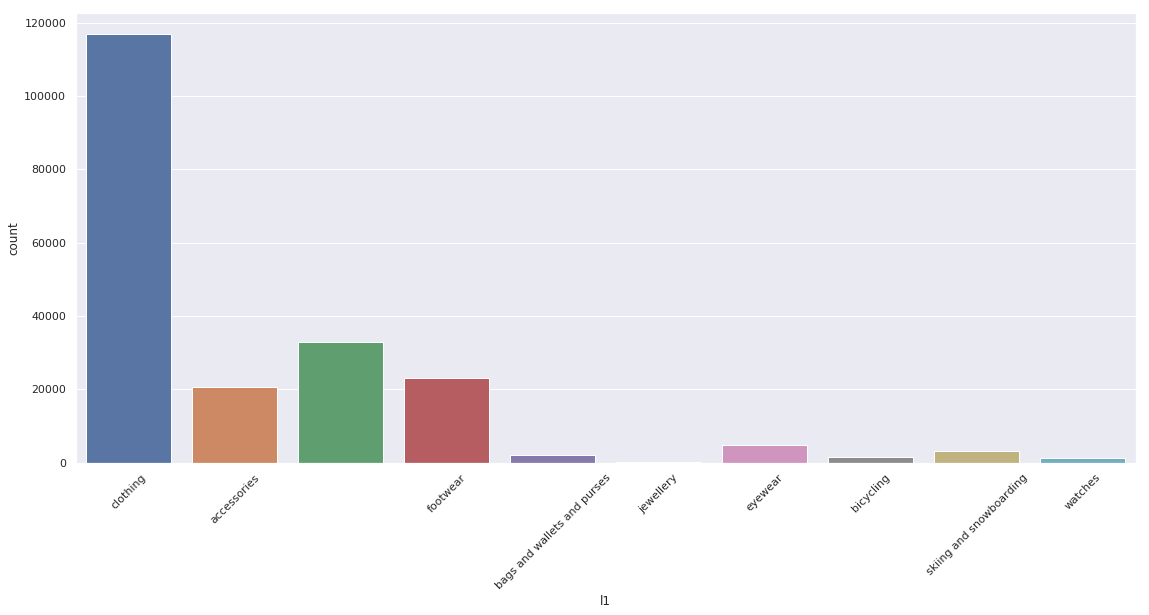

"clothing" category has the highest number of records.
"32884" items have unspecified category.


In [26]:
sns.set(rc={'figure.figsize':(19,8.27)})
count_plot = sns.countplot(x=df_final['l1'])
count_plot.set_xticklabels(labels = df_final['l1'].unique(), rotation=45)

plt.show()
count_dict = df_final['l1'].value_counts()
print('"{}" category has the highest number of records.'.format(max(count_dict.keys(), key=(lambda k: count_dict[k]))))
print('"{}" items have unspecified category.'.format(count_dict['']))

### Company specific presence of records
This can give us the data to find popularity of specific companies with respect to the number of products available in the inventory.

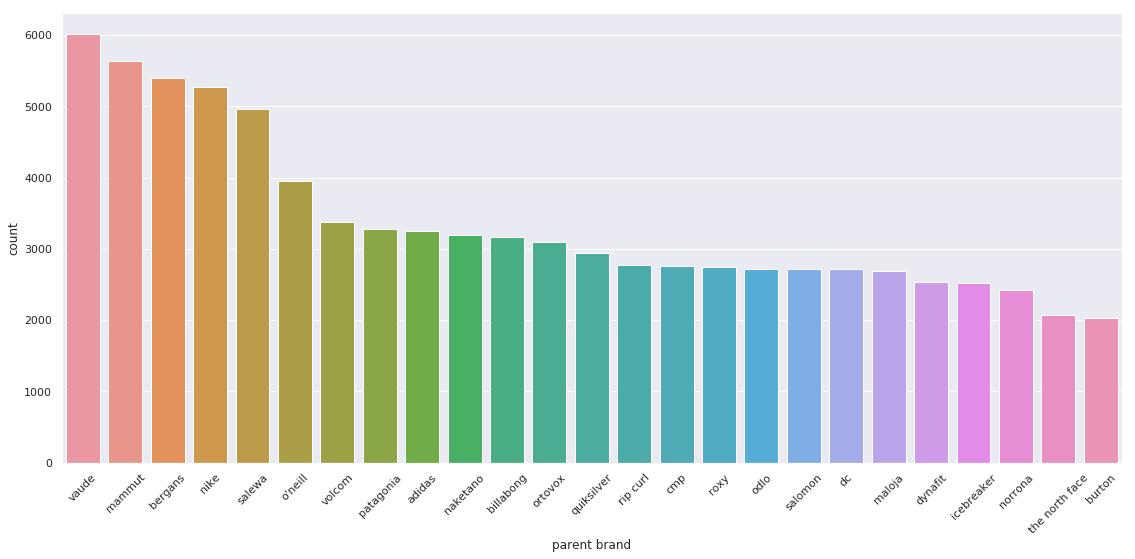

In [27]:
brand_plot = sns.countplot(x=df_final['parent brand'], order=pd.value_counts(df_final['parent brand']).iloc[:25].index)
brand_plot.set_xticklabels(labels = pd.value_counts(df_final['parent brand']).iloc[:25].index, rotation=45)

plt.show()

### Company wise category level 1 plots
Comparing each category's company specific presence, this can give an overview of most trusted and demanded companies for each category or product.

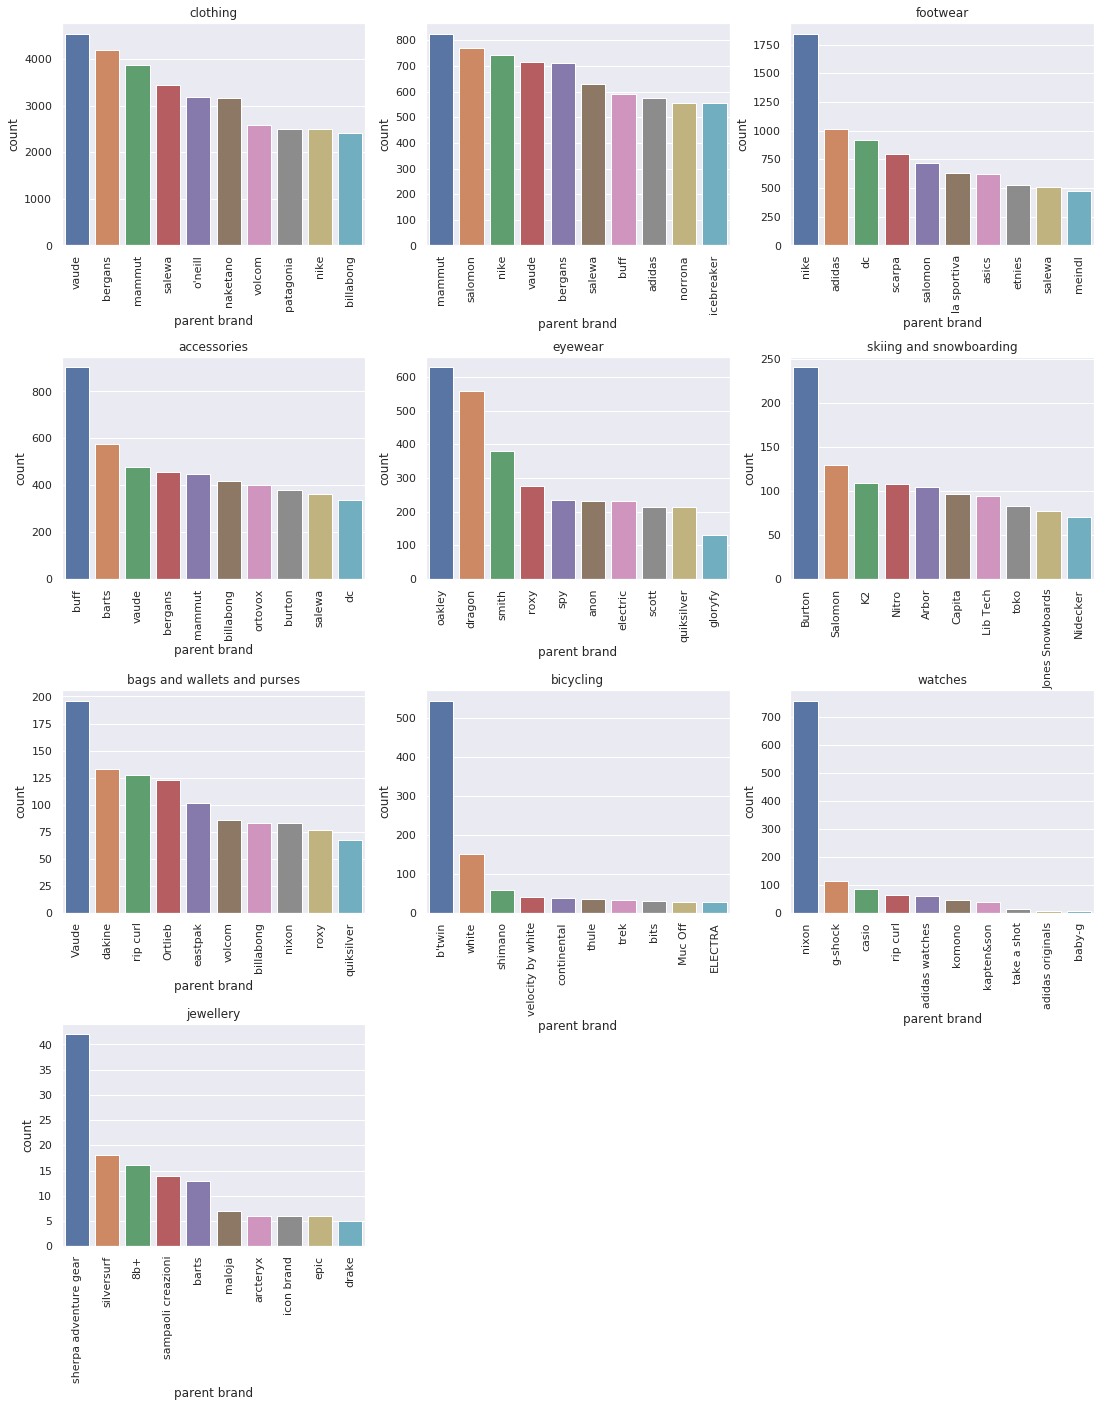

In [28]:
fig = plt.gcf()
fig.set_size_inches(18.5, 22.5)
i = 1
for item_cat in list(count_dict.keys()):
    cat_df = df_final[ df_final['l1'] == item_cat]
    plt.subplot(4,3,i)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(x = cat_df['parent brand'], order=pd.value_counts(cat_df['parent brand']).iloc[:10].index)
    plt.title(item_cat)
    plt.xticks(rotation = 90)
    i+=1


plt.show()

### Category availability with respect to the retailer website
Since, we have a very limited number of retailer websites, we can consider them too for categorical availability.

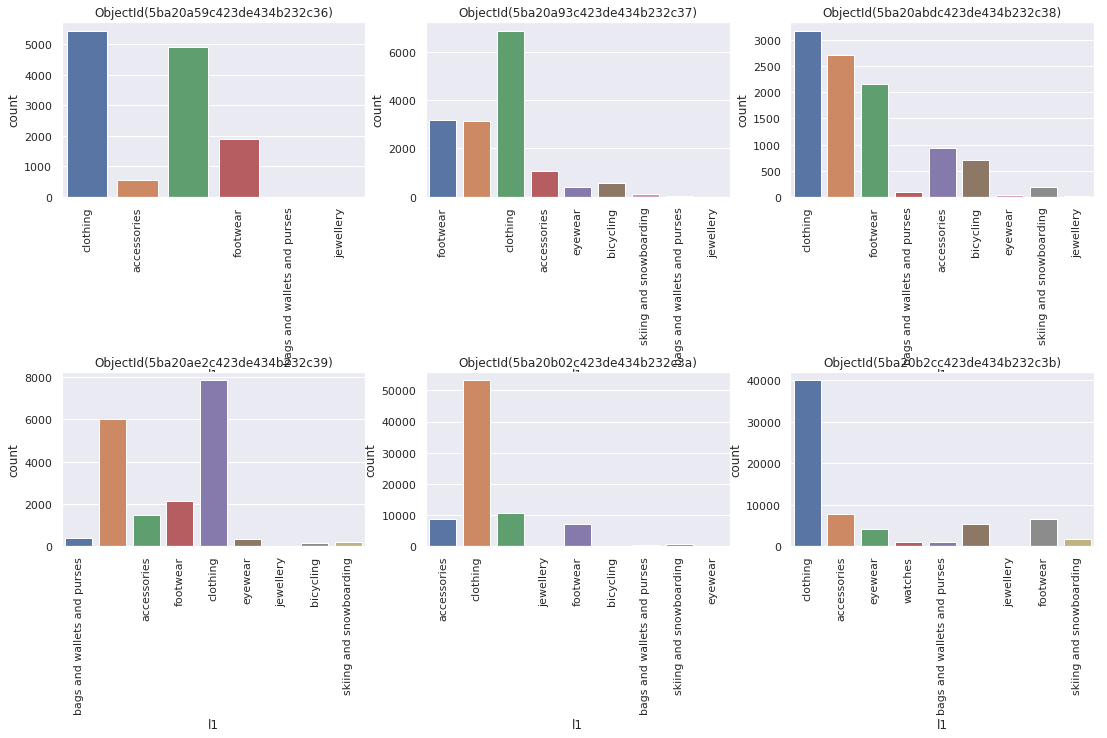

In [29]:
fig = plt.gcf()
fig.set_size_inches(18.5, 22.5)
i = 1
for website_id in list(df_final['website_id'].unique()):
    cat_df = df_final[ df_final['website_id'] == website_id]
    plt.subplot(4,3,i)
    plt.subplots_adjust(wspace=0.2,hspace=1)
    sns.countplot(x = cat_df['l1'])
    plt.title(website_id)
    plt.xticks(rotation = 90)
    i+=1


plt.show()

### Brand availability with respect to the retailer website
This can give us an overview of availability of top brands at specific websites

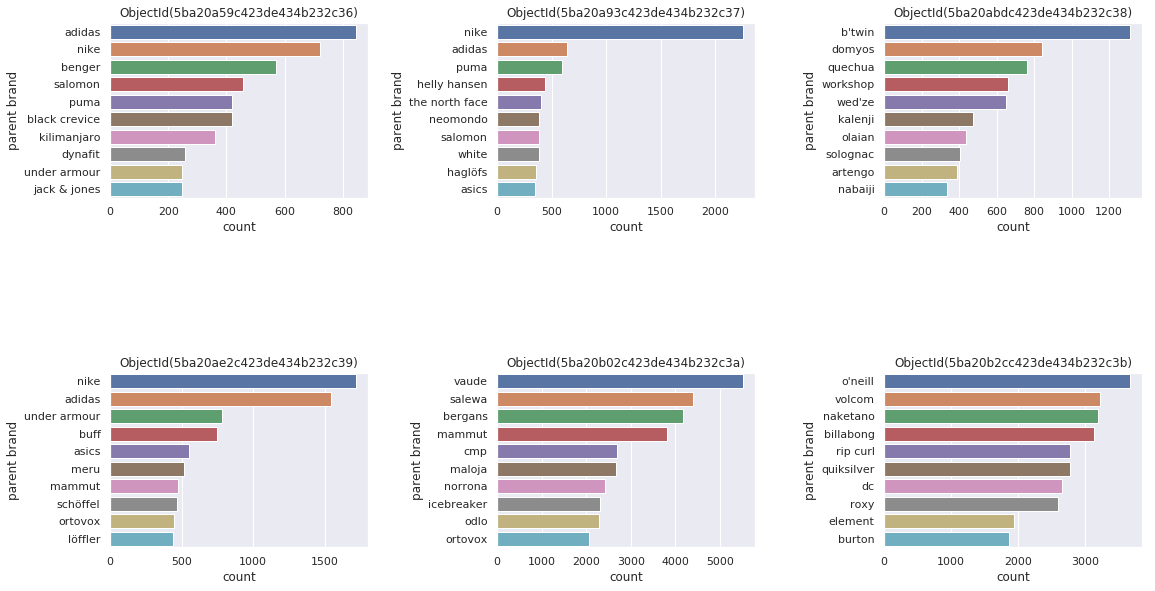

In [30]:
fig = plt.gcf()
fig.set_size_inches(18.5, 22.5)
i = 1
for website_id in list(df_final['website_id'].unique()):
    cat_df = df_final[ df_final['website_id'] == website_id]
    plt.subplot(4,3,i)
    plt.subplots_adjust(wspace=0.5,hspace=1)
    sns.countplot(y = cat_df['parent brand'], order=pd.value_counts(cat_df['parent brand']).iloc[:10].index)
    plt.title(website_id)
    i+=1


plt.show()

#### Similarly, we can visualize some more things like level 2 category count with respect to level 1 category to find the most stocked/demanded product in a more specific manner.

## Observations
* Sub-brand trusted the most by a parent brand can be found by visualizing data of brands with respect to their sub-brands. Likewise, we can find the sub-brand availability at websites and product that can help us find the target audience and customers of each website and parent-sub brand. This info may not be used by the pricing engine but can be used to verify authenticity because of it's popularity

## Price analysis
Let's create a separate column for percentage discount on each product 

### Analysing price with respect to each category considering all of the inventory

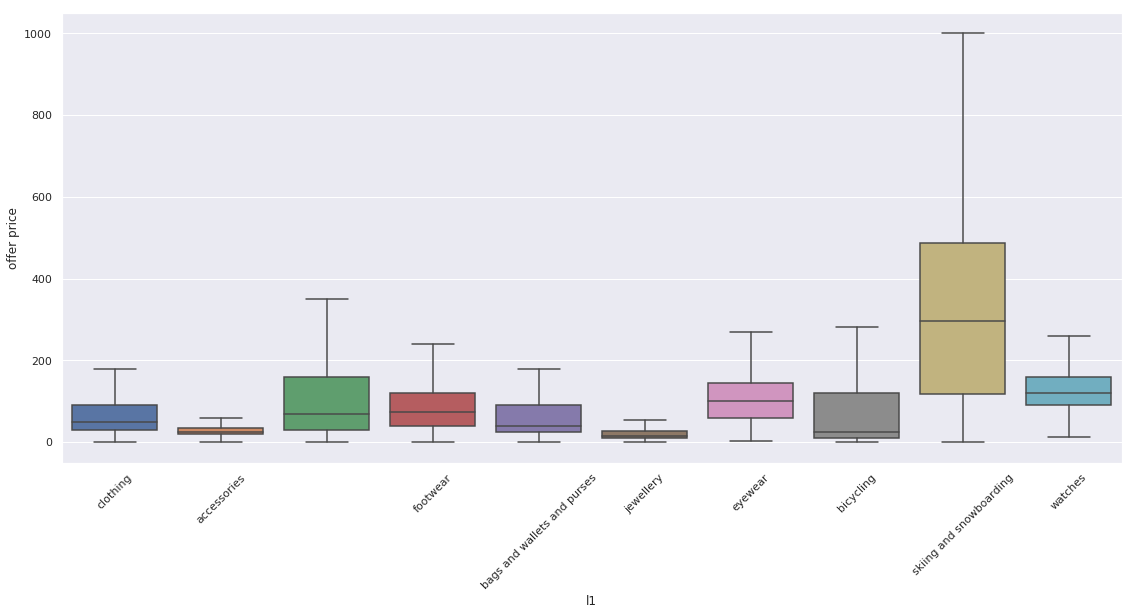

In [31]:
ax = sns.boxplot(x=df_final['l1'], y=df_final['offer price'], showfliers=False)
ax.set_xticklabels(labels = df_final['l1'].unique(), rotation=45)

plt.show()

## Observations
* #### We can observe that 'skiing and snowboarding' has the highest overall pricing throughout the inventory.

* Also, we can see that accessories, bicycling and bags have a mean closer to the lower end of interquartile range. This can give us an idea that, customers of these categories choose more of low range as compared to luxury range or products.

### Website specific category price analysis

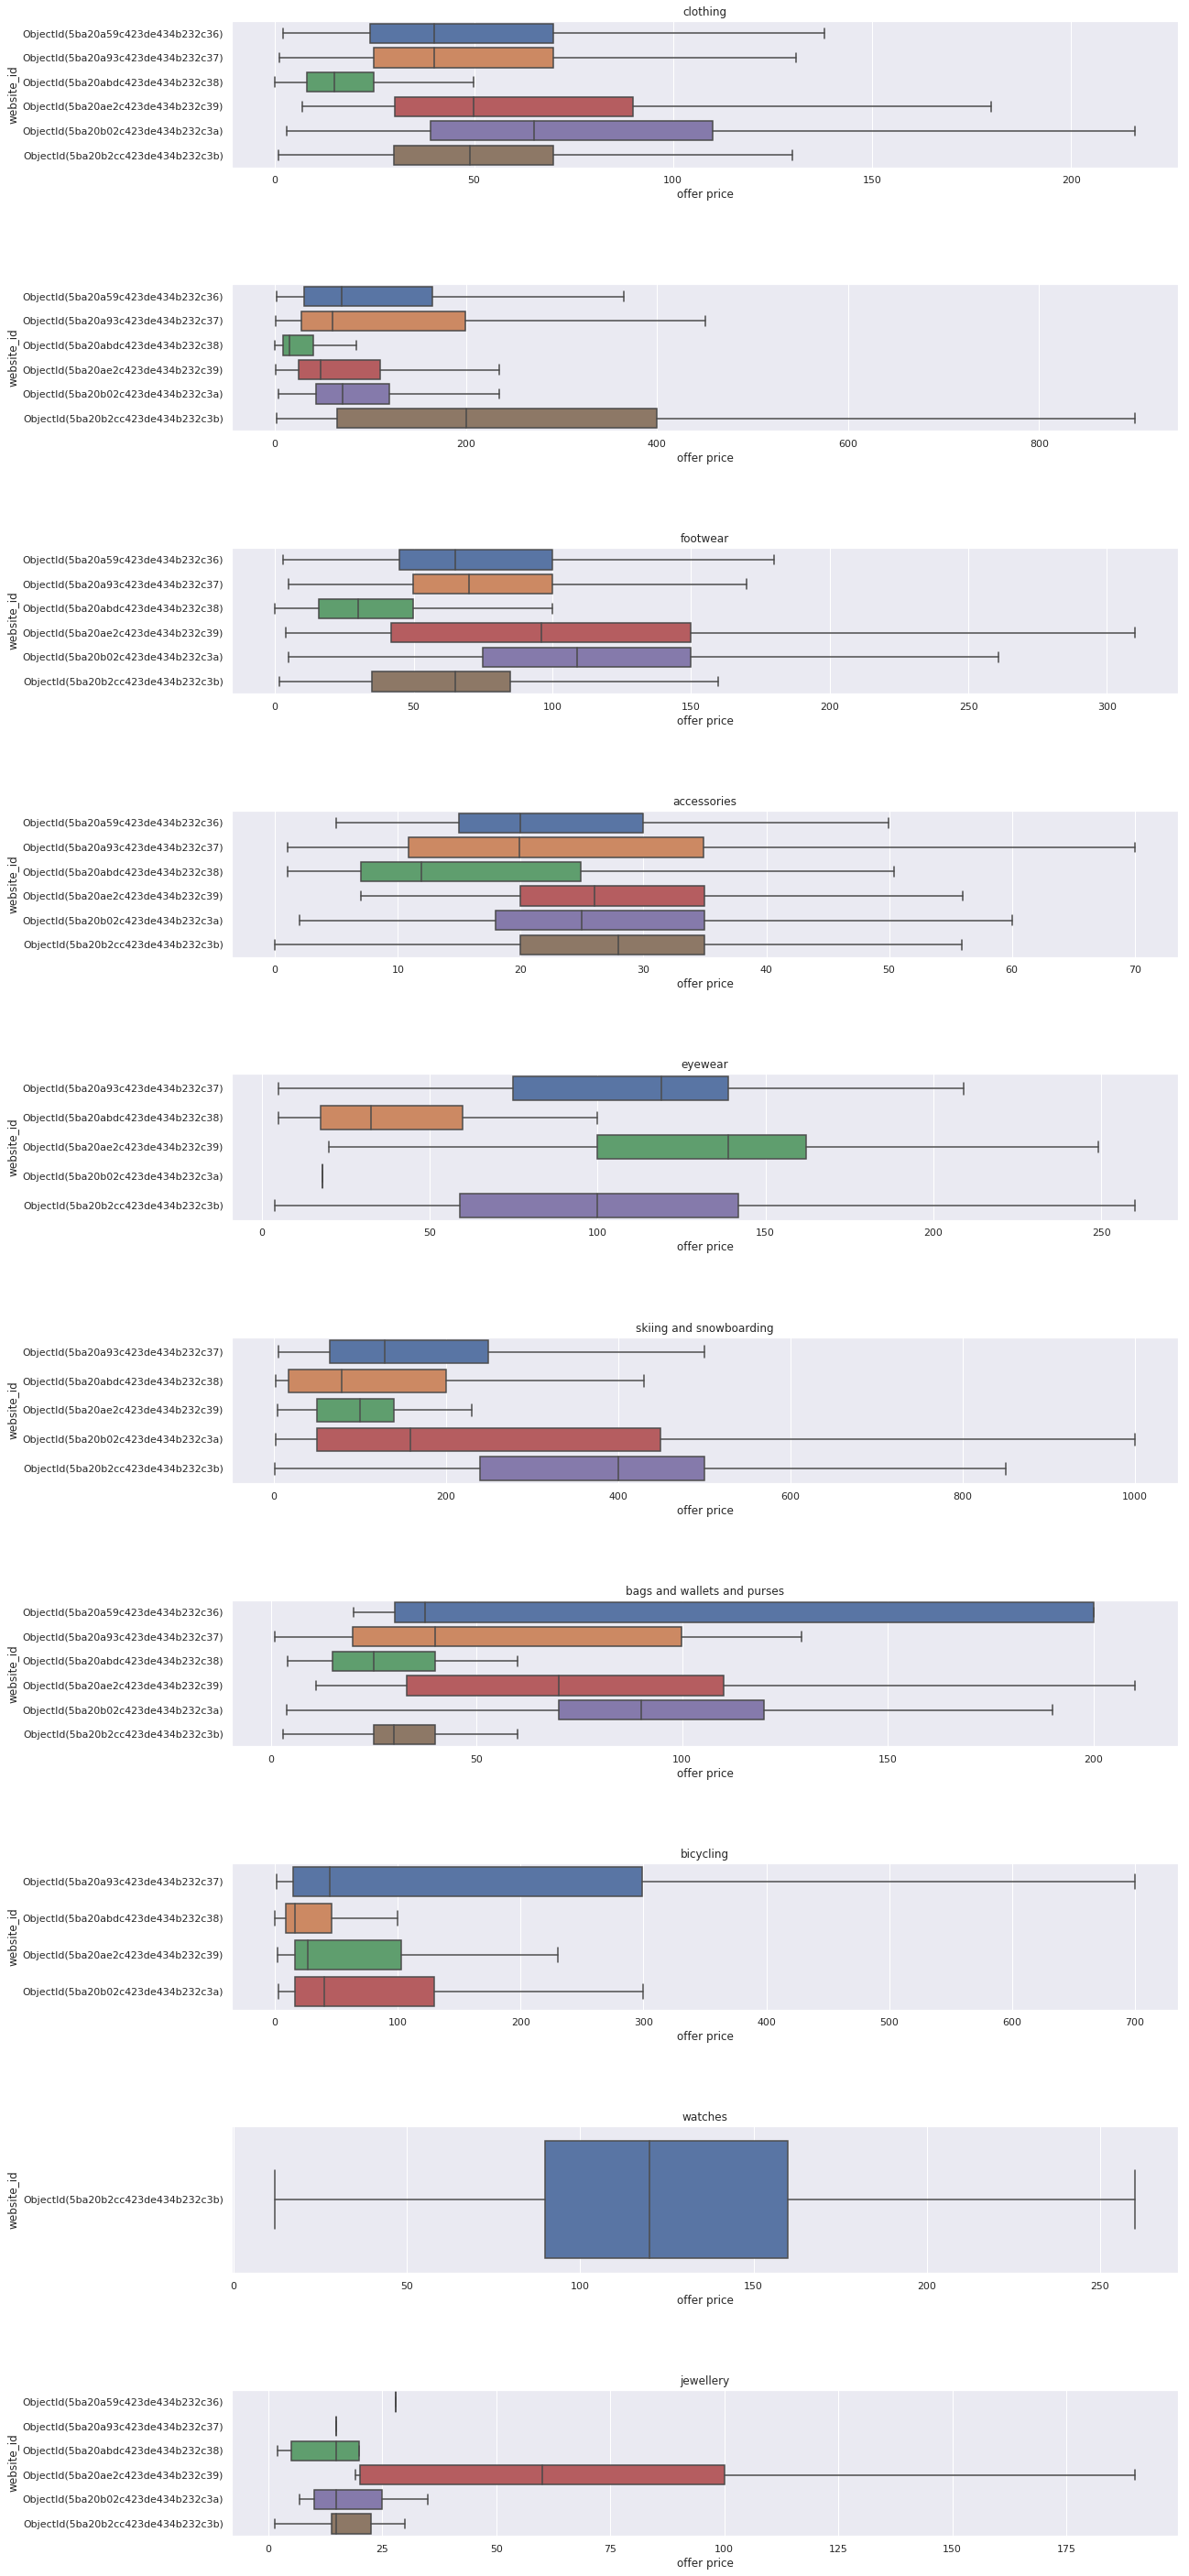

In [32]:
fig = plt.gcf()
fig.set_size_inches(18.5, 50.5)
i = 1
for item_cat in list(count_dict.keys()):
    cat_df = df_final[ df_final['l1'] == item_cat]
    plt.subplot(10,1,i)
    plt.subplots_adjust(wspace=0.5,hspace=0.8)
    sns.boxplot(x = cat_df['offer price'], y = cat_df['website_id'], showfliers=False)
    plt.title(item_cat)
    i+=1


plt.show()


### Observations:
* We can observe that clothing is widely available in all the retail webstores
* Also, watches are available only in 1 website exclusively.
* We can also get an idea of ranges of each category of products avalaible in each website.

### Visualizing category discount % with respect to each website
This can give us an overview of discount availability and popularity of categories of products with respect to websites

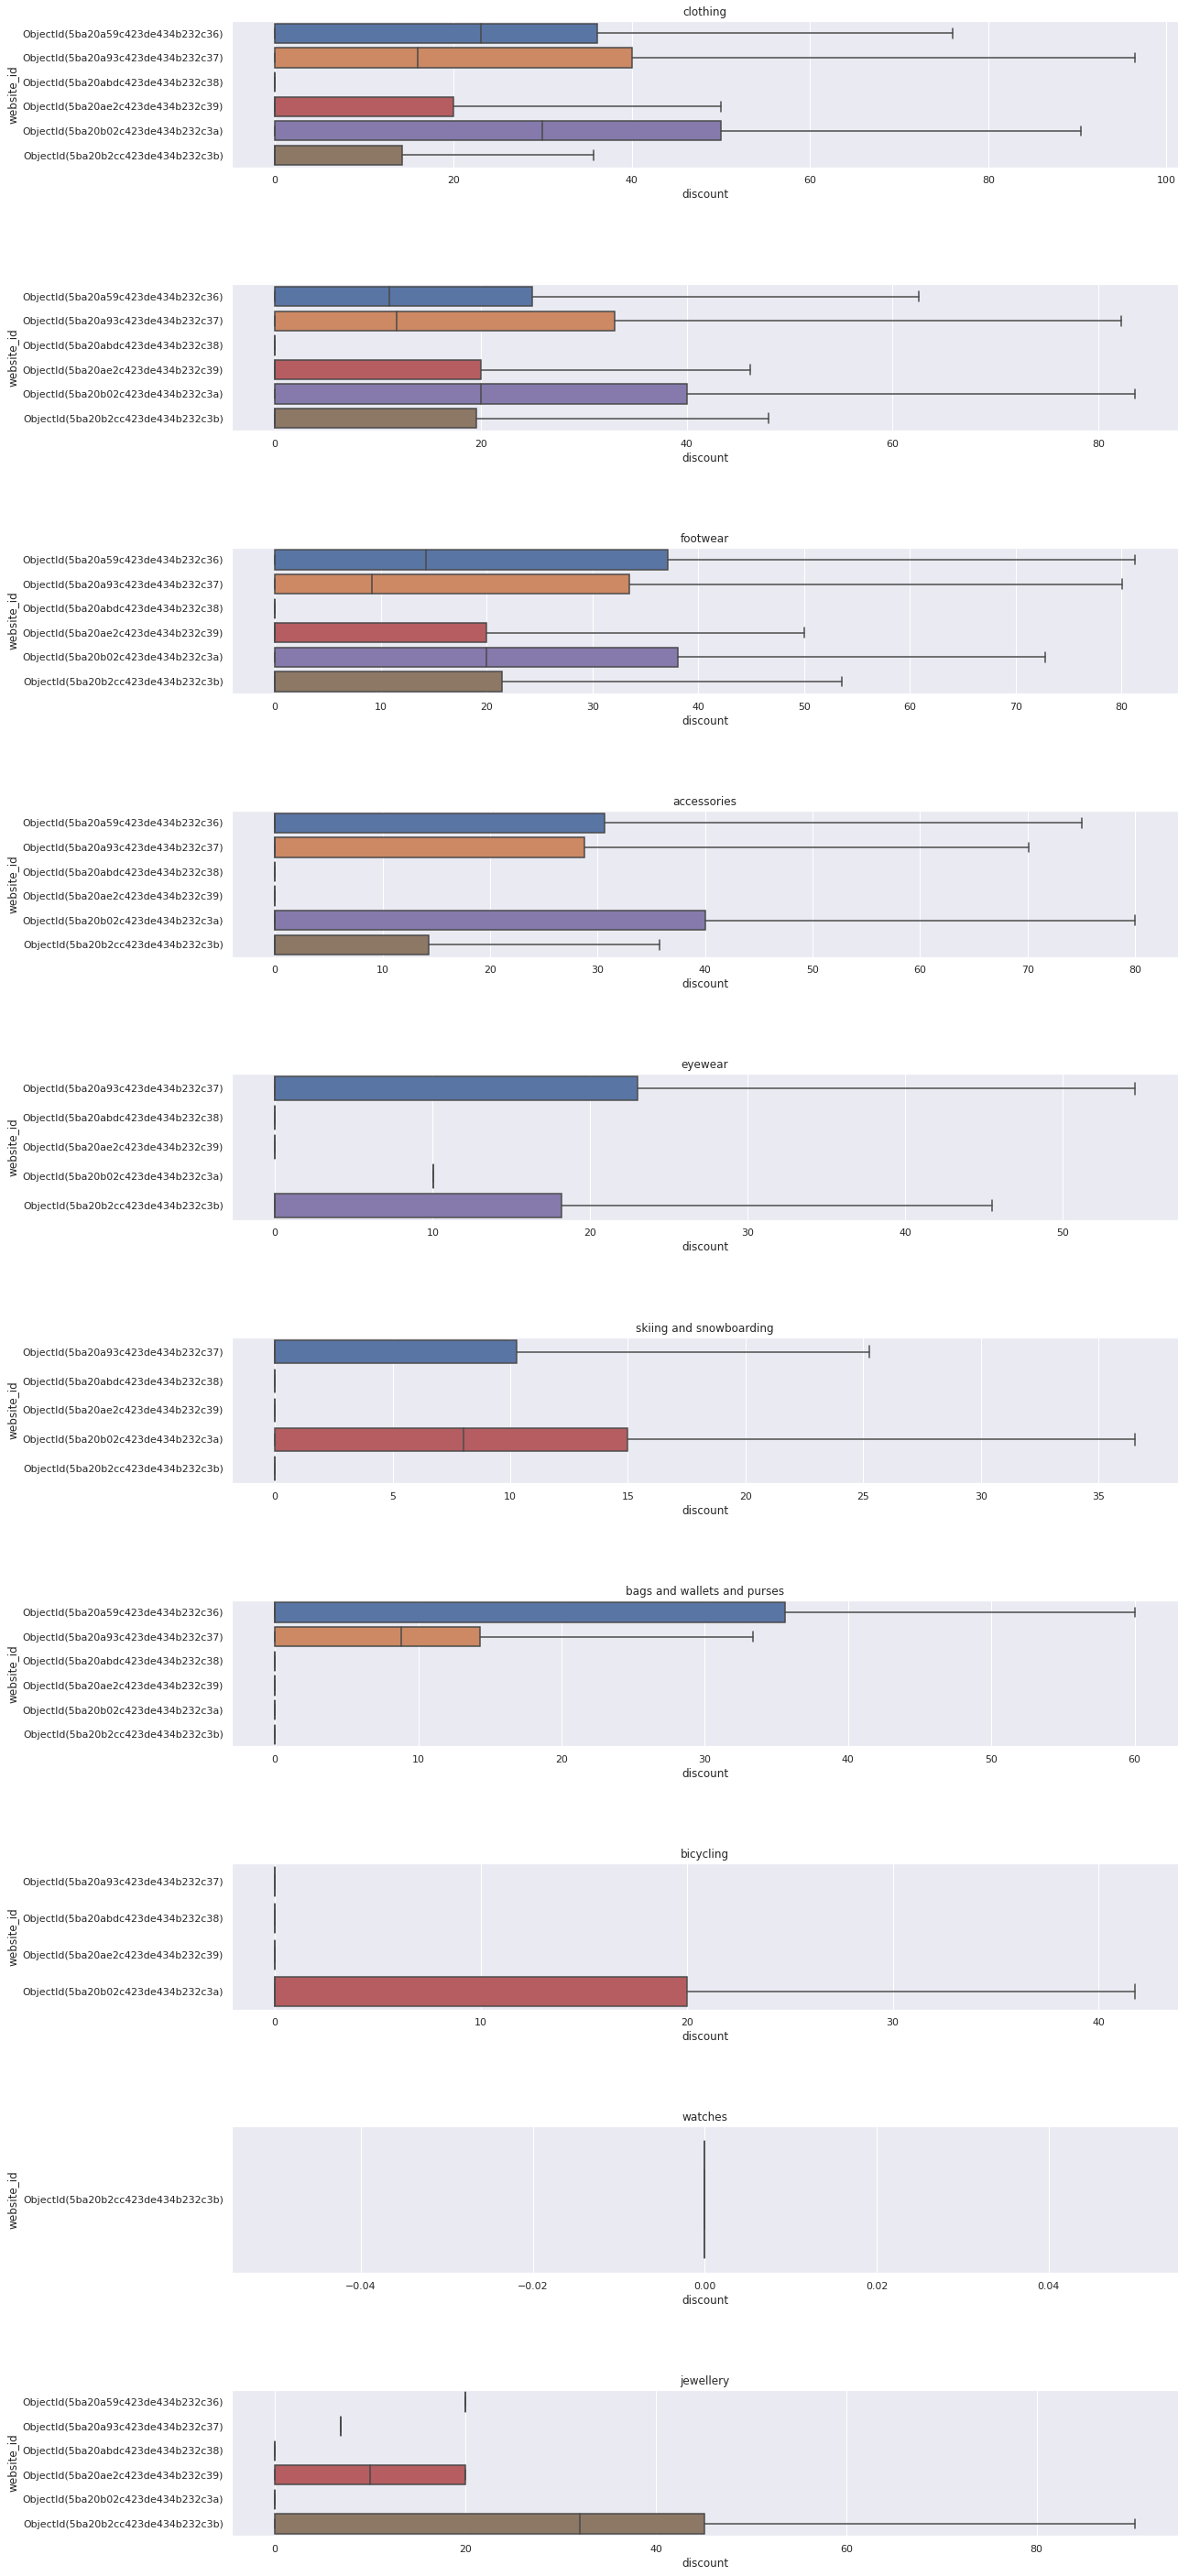

In [33]:
fig = plt.gcf()
fig.set_size_inches(18.5, 50.5)
i = 1
for item_cat in list(count_dict.keys()):
    cat_df = df_final[ df_final['l1'] == item_cat]
    plt.subplot(10,1,i)
    plt.subplots_adjust(wspace=0.5,hspace=0.8)
    sns.boxplot(x = cat_df['discount'], y = cat_df['website_id'], showfliers=False)
    plt.title(item_cat)
    i+=1


plt.show()

## Observations
* There is no discount on watches
* Website of code '5ba20b02c423de434b232c3a' has highest range of discount on almost all the popular products
* Website of code '5ba20abcdc423de434b232c38' has no discount on any product

This can be an advantage for that specific retailer for advertisement and promotion specially for biking accessories.

### Considering attributes available

In [34]:
list((df_final[df_final['units'] != ''])['website_id'].unique())

['ObjectId(5ba20a59c423de434b232c36)',
 'ObjectId(5ba20a93c423de434b232c37)',
 'ObjectId(5ba20abdc423de434b232c38)',
 'ObjectId(5ba20b02c423de434b232c3a)']

## Observation
We can see that, out of 6 there are only 4 websites with size specific stock data.

In [35]:
# CREATING A DATAFRAME FOR ATTRIBUTES

df_attributes = df_final['attributes'].apply(pd.Series)
df_attributes = pd.concat([df_final[['website_id', 
                                     'offer price', 
                                     'regular price',
                                     'discount']], 
                           df_attributes], axis = 1)

df_attributes = df_attributes[['website_id',
                               'offer price',
                               'regular price',
                               'age_group', 
                               'fabric',
                               'lining',
                               'season',
                               'material']]

In [36]:
df_attributes.head()

,website_id,offer price,regular price,age_group,fabric,lining,season,material
20,ObjectId(5ba20a59c423de434b232c36),41.99,59.99,NaN,knit,cotton,NaN,"{'name': '', 'composition': [{'name': 'cotton'..."
29,ObjectId(5ba20a59c423de434b232c36),44.99,79.99,NaN,NaN,NaN,winter,"{'name': '', 'composition': [{'name': 'polyest..."
47,ObjectId(5ba20a59c423de434b232c36),49.99,79.99,NaN,jersey,NaN,NaN,"{'name': '', 'composition': [{'name': 'polyest..."
53,ObjectId(5ba20a59c423de434b232c36),20.00,79.99,NaN,NaN,NaN,NaN,"{'name': '', 'composition': [{'name': 'polyest..."
58,ObjectId(5ba20a59c423de434b232c36),134.99,149.99,NaN,jersey,fleece,winter,"{'name': '', 'composition': []}"


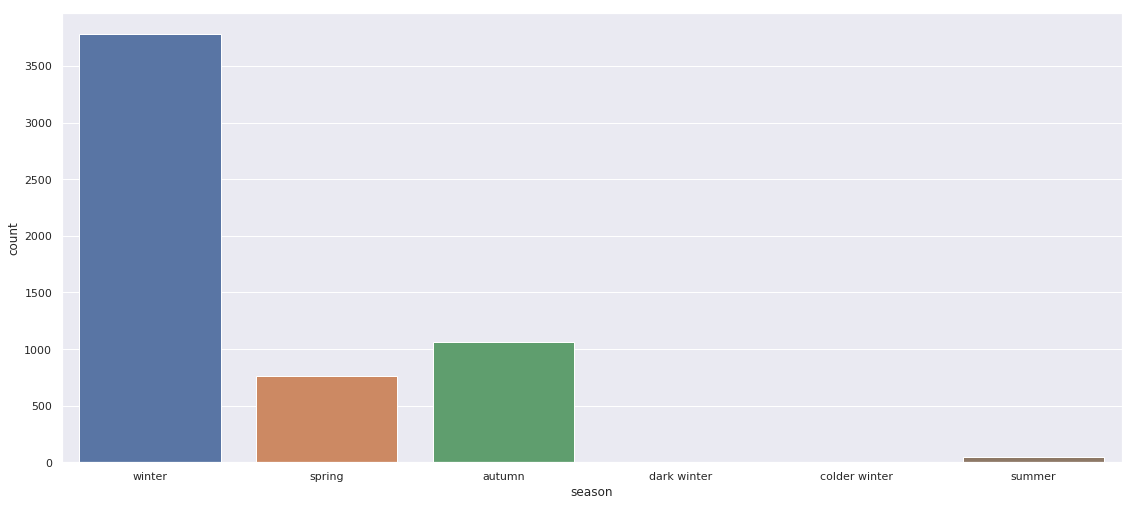

In [37]:
sns.countplot(x = 'season', data=df_attributes)
plt.show()

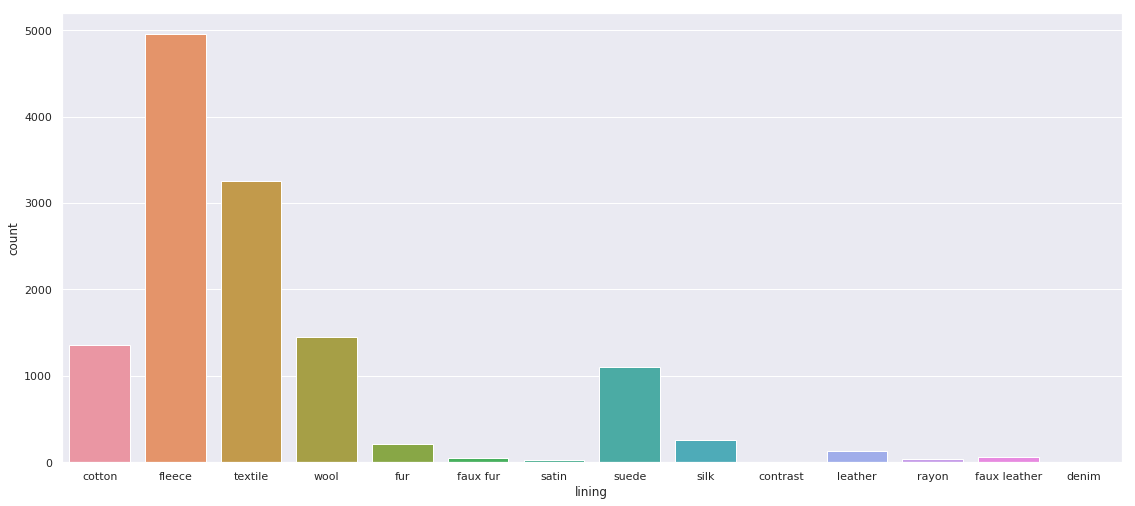

In [38]:
sns.countplot(x = 'lining', data=df_attributes)
plt.show()

## Observations
* We can observe that majority clothes, with available season data are that specified for winter season
* Also, the lining material fleece confirms that winter products are more poplular than others

This can be a factor in promoting products and boosting seasonal sales.

## Creating description data
Making a dataframe specifically for analysing description field.

In [39]:
def check_description(desc):
    if desc == '':
        return np.nan
    else:
        return desc

In [40]:
df_description = df_final[df_final['description_text']!=''][['website_id', 'description_text', 'l1', 'parent brand', 'sub brand']]
df_description['description_text'] = df_description['description_text'].apply(check_description)
df_description = df_description[df_description['l1'] != '']
df_description = df_description.dropna()


## Visualizing description data
Because good description of a new product can lead to increased sales because a new product doesn't have much reviews.

Wordclouds can be used for text data visualization

In [41]:
df_description.head()

,website_id,description_text,l1,parent brand,sub brand
20,ObjectId(5ba20a59c423de434b232c36),the casual checked blouse is made of a woven m...,clothing,odlo,
29,ObjectId(5ba20a59c423de434b232c36),with the quick-drying and moisture-wicking sno...,clothing,odlo,
47,ObjectId(5ba20a59c423de434b232c36),stylish women's cycling jersey with optimal co...,clothing,odlo,
53,ObjectId(5ba20a59c423de434b232c36),fashionable mens softshell jacket from kiliman...,clothing,kilimanjaro,
58,ObjectId(5ba20a59c423de434b232c36),men's alpine running trousers for cold days wi...,clothing,dynafit,


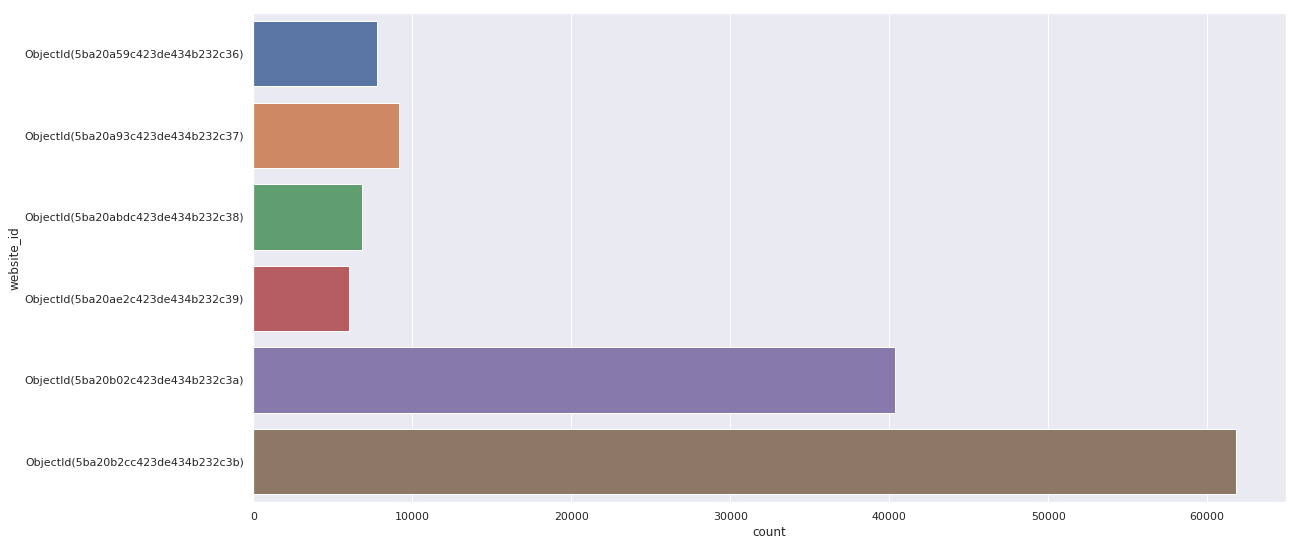

In [42]:
fig = plt.gcf()
fig.set_size_inches(18.5, 9)
sns.countplot(y = df_description['website_id'])

plt.show()

### We can use the description text for product publicity and advertisement if it's new and reviews is not it's feature
Therefore, retailer having good and elaborative description text will have advantage

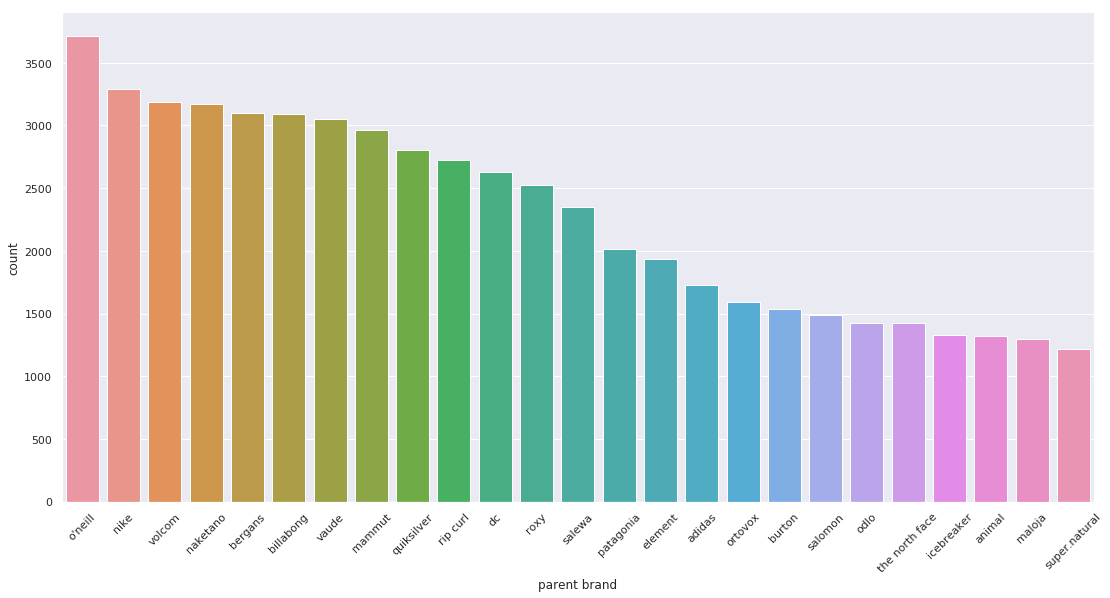

In [43]:
fig = plt.gcf()
fig.set_size_inches(18.5, 9)
brand_plot = sns.countplot(x=df_description['parent brand'], order=pd.value_counts(df_description['parent brand']).iloc[:25].index)
brand_plot.set_xticklabels(labels = pd.value_counts(df_description['parent brand']).iloc[:25].index, rotation=45)

plt.show()

### This can give us and overview of brands that require a description
If, in case a product lacks description, then we can use thumbnail, brand, and description dataset to generate a brief description or get keywords to tag it to a product.

## Gathering insights by relating description text with a brand
We'll use top 15 brands for example

In [44]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
brand_list = list(pd.value_counts(df_description['parent brand']).iloc[:5].index)

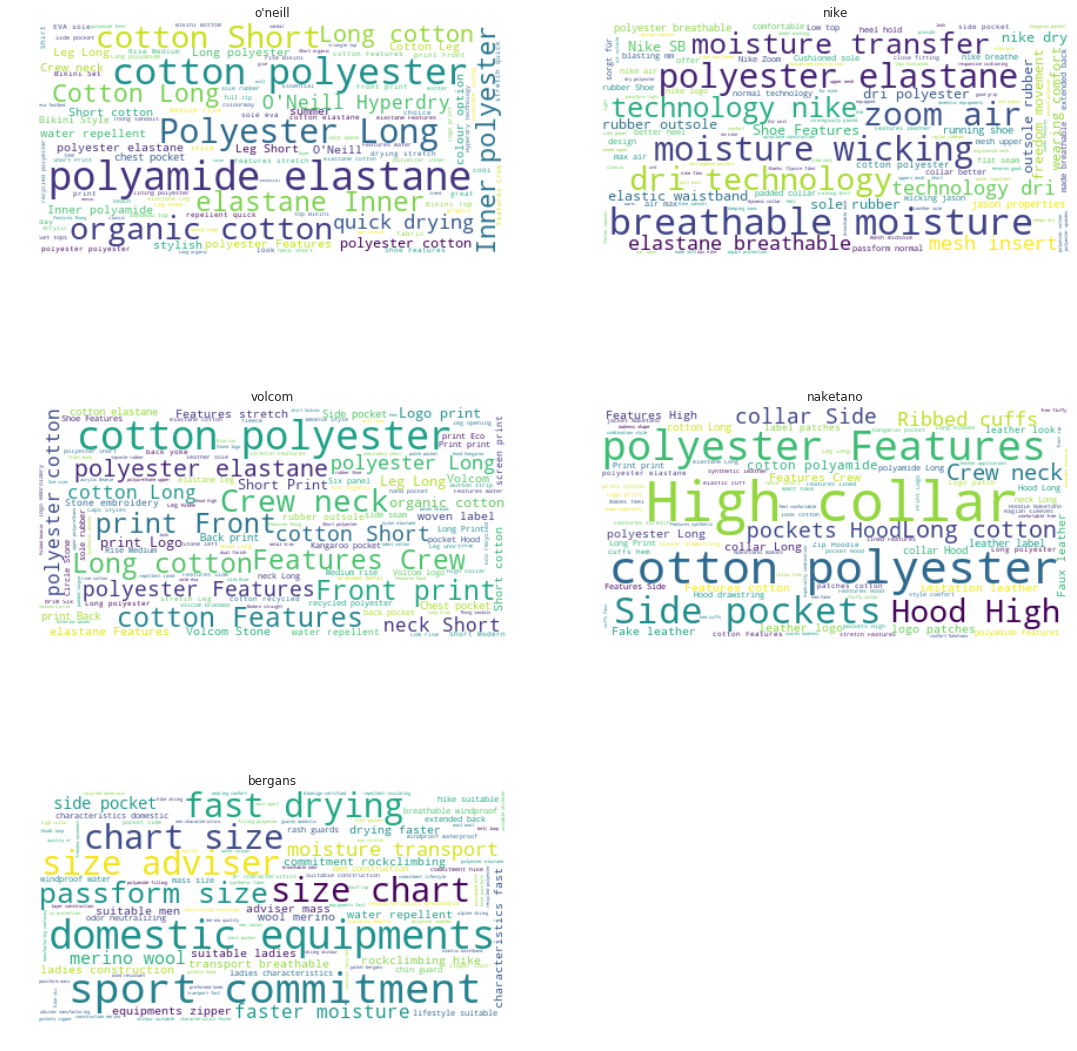

In [46]:
fig = plt.gcf()
fig.set_size_inches(18.5, 20)

stopwords = set(STOPWORDS)

stopwords.update(["Material", "Specification", "product", "details", "Article", "number", "size chart", "Regular", 'fit', "Sleeve", "length"])

i=1

for brand in brand_list:
    df_desc_temp = df_description[df_description['parent brand'] == brand]
    plt.subplot(3,2,i)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(df_desc_temp['description_text']))
    plt.title(brand)
    plt.axis("off")
    plt.imshow(wordcloud, interpolation='bilinear')
    i+=1

### We can find the frequent keywords being used by brands which can be useful to generate keywords which can further be used to create description if it doesn't exist